# P05 - Spectral Analysis

## Exercise 1a: Effect of a Taper 

In this exercise we want to analyse the different parameters that are important in Fourier Analysis. We generate a simple sinusoidal signal in the time domain and analyze its spectral content in the frequency domain applying a
Fourier Transform. Save some of the plots that illustrate the important points and problems that can arise.

Execute the following code:

a) If the sinusoid was infinite, what would the frequency spectrum look like?  

b) Describe what the Fourier Transform is illustrating.

c) Change the number of points *npts* to 72. 

d) Describe the effect of the taper on the new FFT. 

In the first case, the FFT was calculated on a waveform which was very close to three full waveforms. In the second case, the start and end points were very different. 

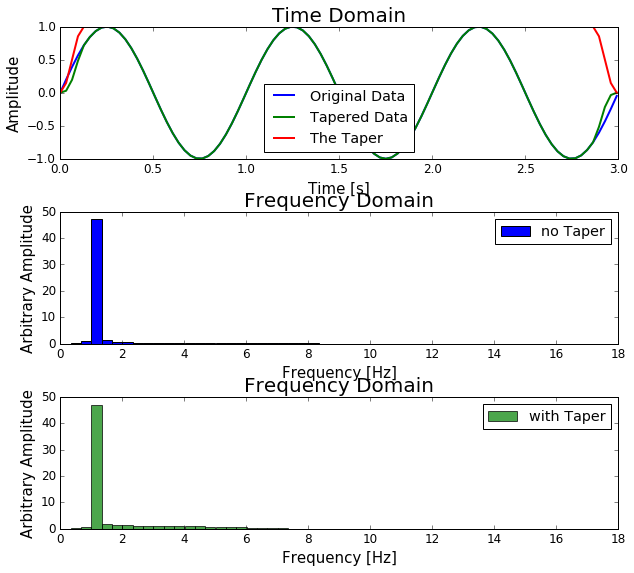

In [166]:
# Code Block 1a
# -*- coding: utf-8 -*-

import matplotlib
matplotlib.rc('font', size=8) # adjust font size of plot
import matplotlib.pyplot as plt
import numpy as np
import os
from obspy.signal.invsim import cosine_taper 
%matplotlib inline
plt.close('all')

# Number of points and sampling frequency
npts = 95  # original value: 95
sampling_freq = np.pi*10  # original value: np.pi*10

# Set generator frequency (in Hz)
f = 1  # original value: 2.15
f2 = 7.8

# Generate f0 Hz sine wave
x = np.arange(npts) / sampling_freq  # time of samples in seconds
# y = np.sin(2*np.pi*f * x + np.pi/5)
y = np.sin(2*np.pi*f * x )


# add sinusoid to signal
# uncomment the following line
#y = y + np.sin(2*np.pi*f2 * x + np.pi/3)

# add noise to the signal
# uncomment following two lines:
#noise_amplitude = 0.7
#y = y + np.random.randn(len(y)) * noise_amplitude

# Percentage of tapering applied to signal, value between 0.0 and 1.0
taper_percentage = 0.1  # original value: 0.1

taper = cosine_taper(npts,taper_percentage)

# Taper signal
y_taper = y * taper

# Do the Fast Fourier Transformation for Real valued data
fy = np.fft.rfft(y, n=npts)
fy_taper = np.fft.rfft(y_taper, n=npts)

# Set up the plots
#
freq = np.linspace(0, sampling_freq/2, len(fy))

from matplotlib import rcParams
rcParams["figure.subplot.hspace"] = (0.4)
rcParams["figure.figsize"] = (10, 9)
rcParams["axes.labelsize"] = (15)
rcParams["axes.titlesize"] = (20)
rcParams["font.size"] = (12)
 

plt.subplot(311)
plt.title('Time Domain')
plt.plot(x, y, label="Original Data", linewidth=2)
plt.plot(x, y_taper, label="Tapered Data", linewidth=2)
plt.plot(x, taper, label="The Taper", linewidth=2)
plt.legend(loc='lower center')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(312)
plt.title('Frequency Domain')
plt.bar(freq, abs(fy), label="no Taper", width=sampling_freq/npts)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Arbitrary Amplitude')

plt.subplot(313)
plt.title('Frequency Domain')
plt.bar(freq, abs(fy_taper), label="with Taper", width=sampling_freq/npts, color='g', alpha=0.7)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Arbitrary Amplitude')

plt.show()

## Exercise 1b: More taper effects

In this exercise we want to analyse the different parameters that are important in Fourier Analysis. We generate a simple sinusoidal signal in the time domain and analyze its spectral content in the frequency domain applying a
Fourier Transform. Save some of the plots that illustrate the important points and problems that can arise.

Execute the following code:

a) Describe what the Fourier Transform is illustrating.

b) Change the number of points in the time series *npts* to different values. Run the program again, describe and explain the effect.

c) Change the sampling frequency *df* of the time series to different values. Run the program again, describe and explain the effect.

d) Change the percentage of tapering *taper_percentage* to different values. Run the program again, describe and explain the effect.

e) Change the windowing function used in the taper. Run the program again, describe and explain the effect. (Note that
none of the standard windowing functions are a good choice for this simple case). 

f) Summarize how the different parameters in this example interact in the spectral estimation. What problems can arise? What connections between the different parameters do you have to keep in mind?

g) Add a sinusoidal signal with a different frequency to your time series (uncomment lines as indicated in the comments). Describe the changes you see in time domain and frequency domain.

h) Add noise to the signal (uncomment the lines where is says so). Explain what you see in time domain and frequency domain.



<br />


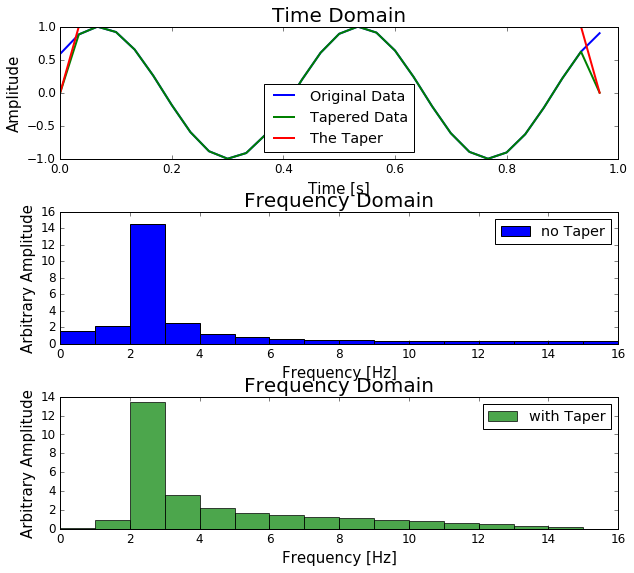

In [165]:
# Code Block 1b 

# -*- coding: utf-8 -*-

import matplotlib
matplotlib.rc('font', size=8) # adjust font size of plot
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
plt.close('all')

# Number of points and sampling frequency
npts = 30  # original value: 33
sampling_freq = 30.0  # original value: 20.0

# Set generator frequency (in Hz)
f = 2.15  # original value: 2.15
f2 = 7.8

# Generate f0 Hz sine wave
x = np.arange(npts) / sampling_freq  # time of samples in seconds
y = np.sin(2*np.pi*f * x + np.pi/5)

# add sinusoid to signal
# uncomment the following line
# y = y + np.sin(2*np.pi*f2 * x + np.pi/3)

# add noise to the signal
# uncomment following two lines:
# noise_amplitude = 0.7
# y = y + np.random.randn(len(y)) * noise_amplitude

# Percentage of tapering applied to signal, value between 0.0 and 1.0
taper_percentage = 0.1  # original value: 0.1

taper = cosine_taper(npts,taper_percentage)

# e) change the windowing function here:
# Taper start/end

# taper = np.hamming(npts) # originally np.hamming(npts)
# There are several window weighting functions:
# np.hamming, np.bartlett, np.hanning, np.blackman


# Taper signal
y_taper = y * taper


# Do the Fast Fourier Transformation for Real valued data
fy = np.fft.rfft(y, n=npts)
fy_taper = np.fft.rfft(y_taper, n=npts)


# Set up the plots
freq = np.linspace(0, sampling_freq/2, len(fy))

from matplotlib import rcParams
rcParams["figure.subplot.hspace"] = (0.4)
rcParams["figure.figsize"] = (10, 9)
rcParams["axes.labelsize"] = (15)
rcParams["axes.titlesize"] = (20)
rcParams["font.size"] = (12)
 

plt.subplot(311)
plt.title('Time Domain')
plt.plot(x, y, label="Original Data", linewidth=2)
plt.plot(x, y_taper, label="Tapered Data", linewidth=2)
plt.plot(x, taper, label="The Taper", linewidth=2)
plt.legend(loc='lower center')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(312)
plt.title('Frequency Domain')
plt.bar(freq, abs(fy), label="no Taper", width=sampling_freq/npts)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Arbitrary Amplitude')

plt.subplot(313)
plt.title('Frequency Domain')
plt.bar(freq, abs(fy_taper), label="with Taper", width=sampling_freq/npts, color='g', alpha=0.7)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Arbitrary Amplitude')

plt.show()


<br />
<br />
<br />

## Exercise 2: Display the Earth's Eigenmodes Excited by a Great Earthquake

In this exercise we load a 30 hours seismogram record of a magnitude 8.0 earthquake in central China (sampled at 1 Hz). Doing a Fourier transform we can study the eigenmodes of the Earth excited by this earthquake. You should control two parameters: The length of the seismogram record used in the Spectral Estimation and the amount of zeros padded before applying the Fourier transform.

First make sure that the practical directory has a subdirectory called *Data*. 

Execute the following code:

a) The plot shows the spectra of the data. The vertical lines in the plot are from analytically computed eigenmodes. Comment on how well the spectra match the analytically calculated eigenmodes. 

b) Change the length of the seismogram record used in the FFT (*hours_used*).

c) Describe the changes in the Spectral Estimation with the length of the seismogram.

d) Reset the hours_used to 10. 

e) Modify the number of zeros which are padded for the FFT. (Use the parameter n). 

f) Describe the changes in the Spectral Estimation with the number of zeros padded. 

g) Try to get an optimal display of the Eigenmodes by adjusting these two parameters.

<br />

GR.FUR..LHE | 2008-05-12T05:15:12.640000Z - 2008-05-12T15:15:12.640000Z | 1.0 Hz, 36001 samples
Length of data record: 36001
Total number of points: 39601


/Users/nunn/anaconda/envs/env_python/lib/python3.5/site-packages/ipykernel/__main__.py:102: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


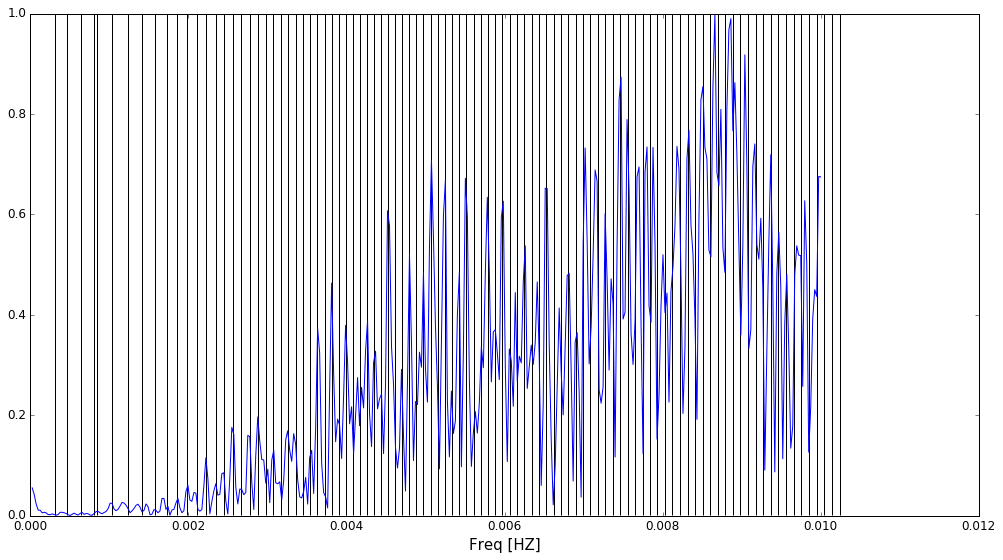

In [132]:
# Code Block 2 
# -*- coding: utf-8 -*-
# 2009-03-12 Moritz
# 2012-02-13 Tobi
# 2016-05-23 Ceri

from obspy import read
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import detrend


# Load data
st = read(os.path.join("Data", "GR.FUR..LHE.D.2008.133"))
st += read(os.path.join("Data", "GR.FUR..LHE.D.2008.134"))
st.merge()
tr = st[0]

# cut length of seismogram
# maximum length is approximately 43
hours_used = 10  # initial value: 10
t_end = tr.stats.starttime + hours_used * 3600
tr.trim(endtime=t_end)
print(tr)

# preprocessing
df = tr.stats.sampling_rate
npts = tr.stats.npts
tr.data = tr.data.astype('float64')  # convert to double
tr.data = detrend(tr.data, 'linear') # detrend
# apply windowing function to ensure the real waveform data 
# starts and ends at zero
tr.data *= np.hanning(npts)          # window

# n: int, optional
# Number of points along transformation axis in the input to use. 
# If n is smaller than the length of the input, the input is cropped. 
# If it is larger, the input is padded with zeros. If n is not given, the 
# length of the input along the axis specified by axis is used.

# define the total length of the record 
n = int(len(tr.data)*1.1)

print ('Length of data record:', len(tr.data))
print ('Total number of points:', n)

# Do the fourier transform
fdat = np.fft.rfft(tr.data, n=n)


# Load the eigenmodes
# eigen = np.loadtxt(os.path.join(pracDir, "eiglst.txt"), 
#                    usecols=[0,1,2,3], converters={1: lambda s: s == "S" and True or False})

# Load the eigenmodes
# (np.loadtxt method to load the eigenmodes has been rewritten, 
# because I had trouble with it reading in strings as bytes in Python 3)
list_e = []
with open(os.path.join(pracDir, "eiglst.txt")) as f:
    # skip first 5 lines    
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    for line in f.readlines():
        a, b, c, d = line.split()[0:4]
        if b == 'S':
            b = 1.
        else:
            b = 0.
        a, b, c = float(a), float(b), float(c)
        list_e.append([a, b, c, d])

        
eigen = np.array(list_e, dtype='float')

# load only the S part
ind1 = eigen[:,1].astype(bool)
ind2 = eigen[:,0]
ind = ((ind2 == 0) & ind1) #bitwise comparing for bool arrays
modes = eigen[ind,3] / 1000  #normalize, freq given in mHz

# Take the first 2% only
N = len(fdat) * 0.02
N = int(N)
freq = np.linspace(0, df/2, len(fdat))
freq = freq[1:N+1] #zero frequency is offset
fdat = fdat[1:N+1]
fdat /= abs(fdat).max() #normalize to 1

# Plot the results
from matplotlib import rcParams
rcParams["figure.subplot.hspace"] = (0.4)
rcParams["figure.figsize"] = (17, 9)
rcParams["axes.labelsize"] = (15)
rcParams["axes.titlesize"] = (20)
rcParams["font.size"] = (12)


plt.figure()
plt.plot(freq, abs(fdat))
plt.vlines(modes[0:len(modes)/2], 0.001, 1)
plt.xlabel('Freq [HZ]')
plt.show()
